# *Image Classification*

In [1]:
#Importing the libraries
import cv2            
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
import keras
from keras import metrics
from keras import layers
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout
from keras import models
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Initializing Convolution Neural Network

In [3]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (64,64,3)))   # Convolutional Layer
classifier.add(MaxPooling2D(pool_size = (2,2)))                                # Pooling Layer

classifier.add(Conv2D(64,(3,3),activation = 'relu')) 
classifier.add(MaxPooling2D(pool_size =(2,2)))

classifier.add(Conv2D(64,(3,3),activation = 'relu')) 
classifier.add(MaxPooling2D(pool_size =(2,2)))

classifier.add(Flatten())                                                      # Flatten Layer
classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dropout(0.5))                                                   # Dropout Layer
classifier.add(Dense(1, activation = 'sigmoid'))                               # Output Layer

## Summary Of the Model

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

## Compiling the Model

In [5]:
classifier.compile(optimizer = 'adam',
                  loss= 'binary_crossentropy',
                  metrics = ['accuracy',metrics.Precision(),metrics.Recall()])

### Data Augmentation

In [6]:
train_datagen = ImageDataGenerator(rescale =1./255,
                                   shear_range =0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip =True)
test_datagen = ImageDataGenerator(rescale = 1./255)

### Setting Train & Test directories

In [7]:
training_set = train_datagen.flow_from_directory('F:/dataset/training_set',
                                                target_size = (64,64),
                                                color_mode = 'rgb',
                                                batch_size = 64,
                                                class_mode = 'binary')
test_set = train_datagen.flow_from_directory('F:/dataset/test_set',
                                                target_size = (64,64),
                                                color_mode = 'rgb',
                                                batch_size = 64,
                                                class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Training the Classifier

In [8]:
from IPython.display import display
from PIL import Image
classifier.fit(training_set,
               epochs = 10,
               validation_data=test_set)

Epoch 1/10
125/125 [==============================] - 159s 1s/step - loss: 0.6864 - accuracy: 0.5451 - precision: 0.5462 - recall: 0.5340 - val_loss: 0.6633 - val_accuracy: 0.6025 - val_precision: 0.6422 - val_recall: 0.4630
Epoch 2/10
125/125 [==============================] - 157s 1s/step - loss: 0.6578 - accuracy: 0.6086 - precision: 0.6011 - recall: 0.6460 - val_loss: 0.6115 - val_accuracy: 0.6785 - val_precision: 0.6968 - val_recall: 0.6320
Epoch 3/10
125/125 [==============================] - 156s 1s/step - loss: 0.6167 - accuracy: 0.6650 - precision: 0.6652 - recall: 0.6643 - val_loss: 0.5909 - val_accuracy: 0.6870 - val_precision: 0.6596 - val_recall: 0.7730
Epoch 4/10
125/125 [==============================] - 157s 1s/step - loss: 0.5921 - accuracy: 0.6848 - precision: 0.6892 - recall: 0.6730 - val_loss: 0.5532 - val_accuracy: 0.7100 - val_precision: 0.7206 - val_recall: 0.6860
Epoch 5/10
125/125 [==============================] - 161s 1s/step - loss: 0.5593 - accuracy: 0.7146

## Testing the Classifier

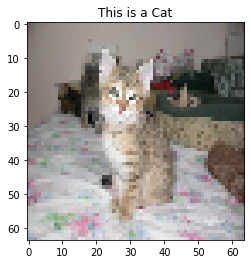

In [9]:
from keras.preprocessing import image
test_image =image.load_img('F:/dataset/test/cat.4045.jpg',target_size =(64,64))
x =image.img_to_array(test_image)
x =np.expand_dims(x, axis =0)
i = 0
text_labels = []
for batch in test_datagen.flow(x, batch_size = 1):
    pred = classifier.predict(batch)
    if pred > 0.5:
        text_labels.append('Dog')
    else:
        text_labels.append('Cat')
        
    plt.title("This is a " + text_labels[i])
    
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()